In [1]:
import numpy as np
import pandas as pd
from joblib import Parallel,delayed,dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
from cust_funcs import *

In [3]:
df=pd.read_csv('Data/training.csv')
X,weights,y=prepare_dataset(df)

In [4]:
parameters={
    'min_samples_leaf':[1,2,5,10],
    'n_estimators':[100,150,200,250]
}

In [5]:
random_states=np.random.randint(10,100,8)
AMS_vals=[];N=[];LR=[]
for slf in parameters['min_samples_leaf']:
    for n in parameters['n_estimators']:
        RF=RandomForestClassifier(n_estimators=n,min_samples_leaf=slf,n_jobs=2)
        trial_vals=Parallel(n_jobs=4)(delayed(ams_curve_tuning)(X,y,weights,slf,n,random_states[i],RF) for i in range(8))
        AMS_vals.append(np.mean(trial_vals));N.append(n);LR.append(slf) 
        
        print('Mean ams = {}, slf = {}, n = {}'.format(np.mean(trial_vals),slf,n))
        
LR=np.array(LR);AMS_vals=np.array(AMS_vals);N=np.array(N)        
print('BEST SCORES: ams = {}, slf = {}, n = {}'.format(max(AMS_vals),
                                                      LR[AMS_vals==max(AMS_vals)][0],N[AMS_vals==max(AMS_vals)][0]))

Mean ams = 3.360861202014717, slf = 1, n = 100
Mean ams = 3.364382303000128, slf = 1, n = 150
Mean ams = 3.3901989732495252, slf = 1, n = 200
Mean ams = 3.3866780136272645, slf = 1, n = 250
Mean ams = 3.3789260610477196, slf = 2, n = 100
Mean ams = 3.4049642789157417, slf = 2, n = 150
Mean ams = 3.401500564070928, slf = 2, n = 200
Mean ams = 3.418786421437465, slf = 2, n = 250
Mean ams = 3.4205201532534804, slf = 5, n = 100
Mean ams = 3.4362833897339686, slf = 5, n = 150
Mean ams = 3.44731927273579, slf = 5, n = 200
Mean ams = 3.4562364620559225, slf = 5, n = 250
Mean ams = 3.445780472444389, slf = 10, n = 100
Mean ams = 3.44561602165918, slf = 10, n = 150
Mean ams = 3.443898796804069, slf = 10, n = 200
Mean ams = 3.446434018889242, slf = 10, n = 250
BEST SCORES: ams = 3.4562364620559225, slf = 5, n = 250


### Fitting and Prediction

In [3]:
X_test,weights,y_test=prepare_dataset(pd.read_csv('Data/testing.csv',index_col=0))

X_train,_,y_train=prepare_dataset(pd.read_csv('Data/training.csv'))

X_test=prepare_training_features(X_test,X_dep=X_train)

In [5]:
RF=RandomForestClassifier(n_estimators=250,min_samples_leaf=5,n_jobs=-1)
RF.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=250, n_jobs=-1)

In [6]:
prediction_proba=RF.predict_proba(X_test)[:,1]

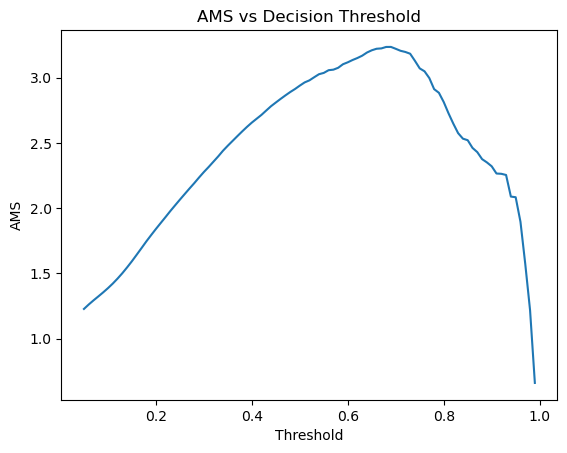

In [7]:
ams_dat,max_ams=ams_curve(prediction_proba,y_test,weights,test_ratio=1)

In [8]:
np.savetxt('Data/RF_curve.csv',ams_dat)

In [9]:
print('Final AMS = {}'.format(max_ams))

Final AMS = 3.236380156037992
